### Temperature scaling



## 1. Sampling

A text generation model provides probability values for next word from possible vocabulary. For example 

|**|**|
|---|---|
|given sentence  | Every effort moves you ____|
|vocabs          |["closer", "forward", "toward"]|
|model_output    | [1.2, 6.5, 3.1]|
|softmax_prob    | [0.0744, 0.7425, 0.1831]|

Since model has predicted higher probability to forward, every time it will generate "forward" as the next word


What if we need model to respect the softmax prob distribution ?

Solution : **We need to sample from total vocab based on the probability**

## 2. Temperature

What if we want to add/ reduce this randomnes from sampling.

|Temperature|Expected result |
|--|--|
|1| No additional randomness (Only based on nn output)|
|<1| Less randomness (narrows the gap)|
|>1| More randomness (widens the gap)|

In [12]:
import torch
vocabs = {"closer" : 0, "forward" : 1, "toward" : 2}
inverse_vocabs = {v:k for k,v in vocabs.items()}

In [13]:
model_output = torch.tensor([2.2,4.5,3.1])
probs = torch.softmax(model_output, dim=0)

In [19]:
samples = [torch.multinomial(probs, num_samples=1).item() for i in range(10)]
print(samples)

[1, 2, 1, 1, 2, 1, 2, 1, 1, 1]


In [23]:
# To increase randomness we can divide model_output by > 1 which will reduce the gap between number
print(model_output)
print(model_output / 5)

tensor([2.2000, 4.5000, 3.1000])
tensor([0.4400, 0.9000, 0.6200])


In [24]:
new_probs = torch.softmax(model_output/5, dim=0)
samples = [torch.multinomial(new_probs, num_samples=1).item() for i in range(10)]
print(samples)

[0, 0, 0, 2, 1, 2, 2, 0, 2, 2]


### Visualizing the effect of temperature

In [25]:
def softmax_with_temperature(logits, temperature):
    scaled_logits = logits / temperature
    return torch.softmax(scaled_logits, dim=0)

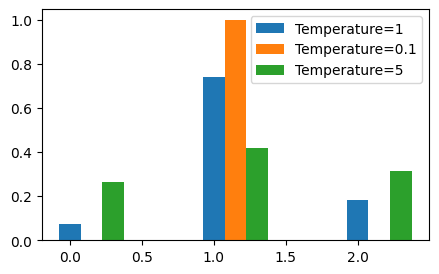

In [26]:
import matplotlib.pyplot as plt
temperatures = [1, 0.1, 5]
scaled_probas = [softmax_with_temperature(model_output, T) for T in temperatures]

x =torch.arange(len(vocabs))
bar_width = 0.15
fig, ax = plt.subplots(figsize=(5,3))
for i, T in enumerate(temperatures):
    rects = ax.bar(x+i *bar_width, scaled_probas[i], bar_width, label = f"Temperature={T}" )
ax.legend()
plt.show()